In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, execute,IBMQ
from qiskit.circuit.library import Permutation
from qiskit.tools.monitor import job_monitor

backend = provider.get_backend('ibmq_qasm_simulator')

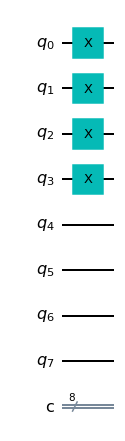

In [3]:
q = QuantumRegister(8, 'q')
c = ClassicalRegister(8, 'c')

########### PERMUTATION WITH PATTERN 7,0,6,1,5,2,4,3 
circuit = QuantumCircuit(q, c)

circuit.x(q[0])
circuit.x(q[1])
circuit.x(q[2])
circuit.x(q[3])

circuit.draw()

/tmp/ipykernel_513/3182146346.py:1: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  circuit += Permutation(num_qubits = 8, pattern = [7,0,6,1,5,2,4,3])


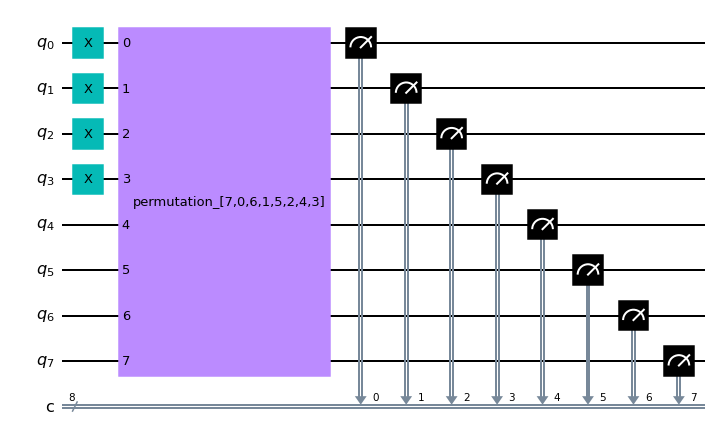

In [4]:
circuit += Permutation(num_qubits = 8, pattern = [7,0,6,1,5,2,4,3])

circuit.measure(q, c)
circuit.draw()

In [5]:
job = execute(circuit, backend, shots=100)
job_monitor(job)

Job Status: job has successfully run


In [6]:
counts = job.result().get_counts()
#print(circuit)
print(counts)

{'10101010': 100}


In [7]:
####### RANDOM PERMUTATION CIRCUIT 
circuit = QuantumCircuit(q, c)

circuit.x(q[0])
circuit.x(q[1])
circuit.x(q[2])
circuit.x(q[3])

/tmp/ipykernel_513/4121543232.py:1: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  circuit += Permutation(num_qubits = 8)


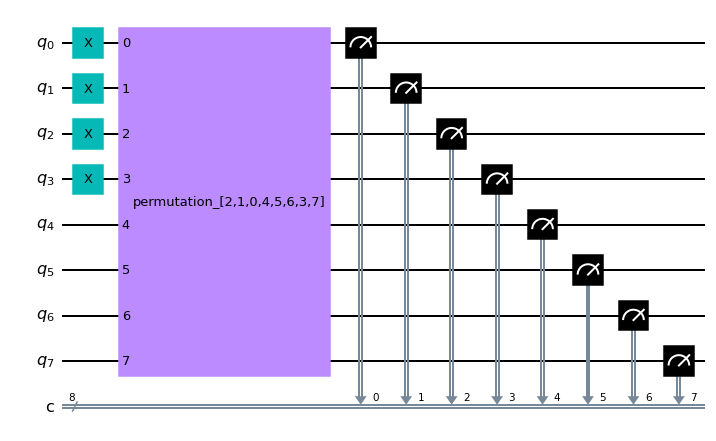

In [8]:
circuit += Permutation(num_qubits = 8)

circuit.measure(q, c)
circuit.draw()

In [9]:
job = execute(circuit, backend, shots=100)
job_monitor(job)

Job Status: job has successfully run


In [10]:
counts = job.result().get_counts()

#print(circuit)
print(counts)

{'01000111': 100}
